In [1]:
import os

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.animation as animation
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
from IPython.display import HTML


# 利用文化部的資料，畫出從有資料以來(2018年8月)的票房累積競賽圖

In [3]:
allFileList = os.listdir('C:/Users/Michael/Desktop/python/movie')

In [4]:
#allFileList

In [5]:
def number(n):
    l=[]
    for i in range(len(n)):
        try:
            l.append(int(n[i].replace(',','')))
        except:
            l.append(n[i])
    return l

In [6]:
def word(w):
    l=[]
    for i in range(len(w)):
        try:
            l.append(w[i].replace(' ',''))
        except:
            l.append(w[i])
    return l

In [7]:
all_data=[]
for i in range(len(allFileList)):
    all_data.append(pd.read_excel(f'C:/Users/Michael/Desktop/python/movie/{allFileList[i]}'))

In [8]:
for i in range(len(all_data)):
    all_data[i]['累計銷售金額']=number(all_data[i].iloc[:,-1])

In [9]:
for i in range(len(all_data)):
    all_data[i]['中文片名']=word(all_data[i].iloc[:,2])

In [10]:
all_movie=[]
for i in range(len(all_data)):
    for s in range(len(all_data[i])):
        all_movie.append(all_data[i]['中文片名'][s])

In [23]:
all_movie=pd.unique(all_movie)
len(all_movie)

118

In [12]:
def randomcolor(n):
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    colors=[]
    for s in range(n):
        col = ""
        for i in range(6):
            col += colorArr[np.random.randint(0,15)]
            color="#"+col
        colors.append(color)
    return colors


In [13]:
movie_colors=randomcolor(len(all_movie))

In [14]:
cols = dict(zip(
    all_movie,
    movie_colors
))

In [15]:
k=pd.DataFrame(all_data[(0)].groupby('中文片名').累計銷售金額.max()).reset_index()
kk=k.sort_values(by='累計銷售金額',ascending=True).tail(10)
movies=[kk]
for i in range(len(all_data)-1):
    m1=movies[i]
    m2=all_data[(i+1)]
    m=pd.concat([m1,m2])
    mm=pd.DataFrame(m.groupby('中文片名').累計銷售金額.max()).reset_index()
    mm=mm.sort_values(by='累計銷售金額',ascending=True).tail(10)
    movies.append(mm)

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [16]:
for i in range(len(movies)):
    movies[i]['次數']=i
    

In [17]:
movies2=pd.concat(movies)
fr=list(movies2['次數'].unique())


In [19]:
def time_barh(movie):
    colors=[]
    mo=movies2[movies2['次數']==movie]
    plt.cla()
    for x in mo['中文片名']:
        colors.append(cols[x])
    plt.barh(data=mo,width='累計銷售金額',y='中文片名',height=0.8,color=colors)
    plt.grid(which='major', axis='x', linestyle='-')
    plt.title('2018年8月開始國片票房累積變化圖')
    plt.xlabel('票房(千萬)')
    plt.box(False)

In [20]:
import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 0

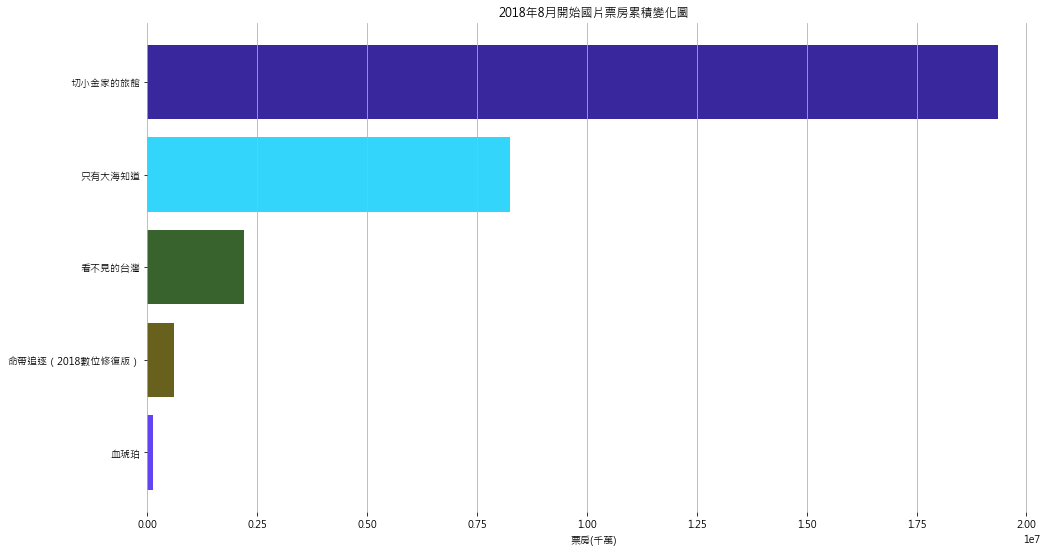

In [22]:
fig, ax = plt.subplots(figsize=(16, 9))
animator = animation.FuncAnimation(fig, time_barh, frames=fr)
animator.save("movie.mp4", fps=2)